In [1]:
!echo $HF_HOME

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/hf/misc


### Diffuser PixArt version

In [2]:
import torch
from diffusers import PixArtAlphaPipeline, ConsistencyDecoderVAE, AutoencoderKL
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# You can replace the checkpoint id with "PixArt-alpha/PixArt-XL-2-512x512" too.
pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-1024-MS", torch_dtype=torch.float16, use_safetensors=True)

# If use DALL-E 3 Consistency Decoder
# pipe.vae = ConsistencyDecoderVAE.from_pretrained("openai/consistency-decoder", torch_dtype=torch.float16)

# If use SA-Solver sampler
# from diffusion.sa_solver_diffusers import SASolverScheduler
# pipe.scheduler = SASolverScheduler.from_config(pipe.scheduler.config, algorithm_type='data_prediction')

# If loading a LoRA model
# transformer = Transformer2DModel.from_pretrained("PixArt-alpha/PixArt-LCM-XL-2-1024-MS", subfolder="transformer", torch_dtype=torch.float16)
# transformer = PeftModel.from_pretrained(transformer, "Your-LoRA-Model-Path")
# pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-LCM-XL-2-1024-MS", transformer=transformer, torch_dtype=torch.float16, use_safetensors=True)
# del transformer

# Enable memory optimizations.
# pipe.enable_model_cpu_offload()

pipe.to(device)

prompt = "A small cactus with a happy face in the Sahara desert."
image = pipe(prompt).images[0]
image.save("./catcus.png")

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing PixArtTransformer2DModel: 
 ['caption_projection.y_embedding']


  0%|          | 0/20 [00:00<?, ?it/s]


Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


  0%|          | 0/20 [00:00<?, ?it/s]

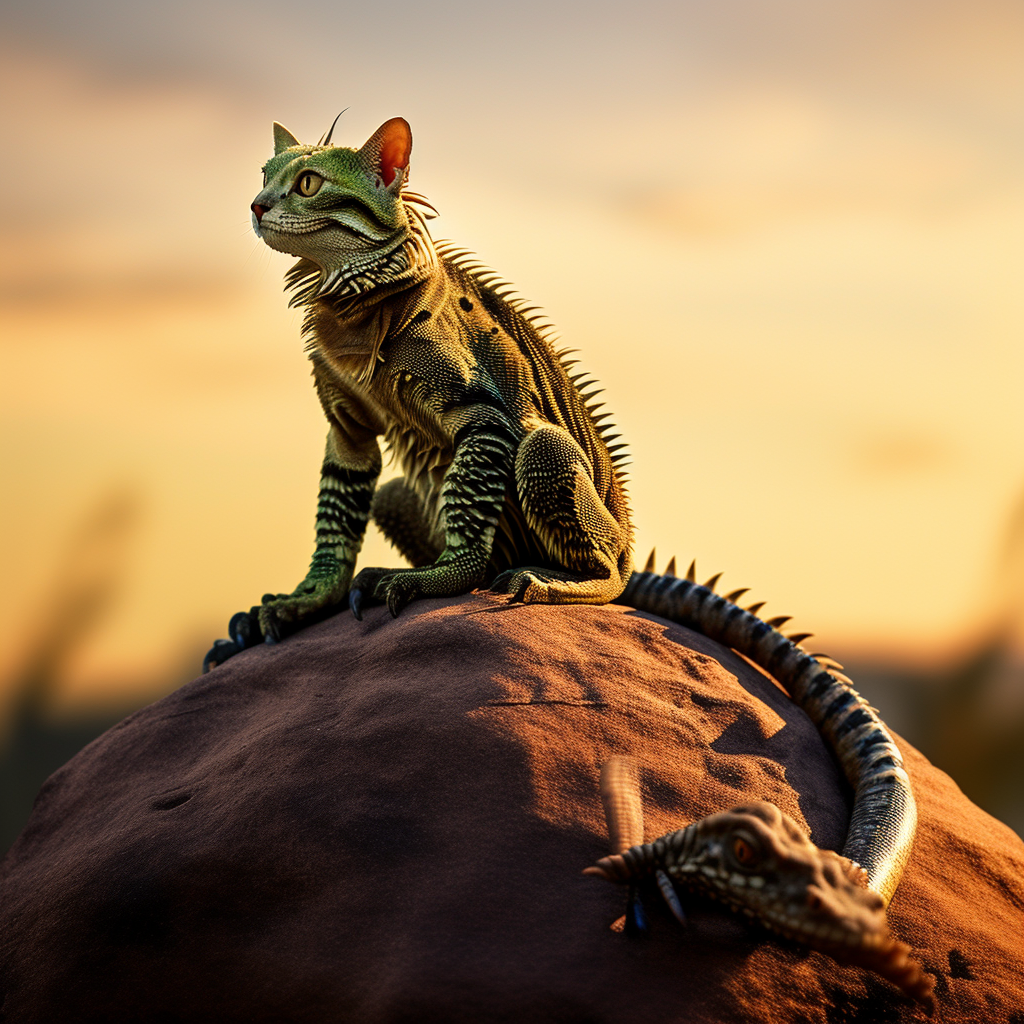

In [28]:
prompt = "A cat sitting on top of an iguana"
image = pipe(prompt).images[0]
image

### internals

In [8]:
pipe.transformer

PixArtTransformer2DModel(
  (pos_embed): PatchEmbed(
    (proj): Conv2d(4, 1152, kernel_size=(2, 2), stride=(2, 2))
  )
  (transformer_blocks): ModuleList(
    (0-27): 28 x BasicTransformerBlock(
      (norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn1): Attention(
        (to_q): Linear(in_features=1152, out_features=1152, bias=True)
        (to_k): Linear(in_features=1152, out_features=1152, bias=True)
        (to_v): Linear(in_features=1152, out_features=1152, bias=True)
        (to_out): ModuleList(
          (0): Linear(in_features=1152, out_features=1152, bias=True)
          (1): Dropout(p=0.0, inplace=False)
        )
      )
      (norm2): LayerNorm((1152,), eps=1e-06, elementwise_affine=False)
      (attn2): Attention(
        (to_q): Linear(in_features=1152, out_features=1152, bias=True)
        (to_k): Linear(in_features=1152, out_features=1152, bias=True)
        (to_v): Linear(in_features=1152, out_features=1152, bias=True)
        (to_out): Mod

In [29]:
type(pipe.transformer)

diffusers.models.transformers.pixart_transformer_2d.PixArtTransformer2DModel

In [33]:
dict(pipe.transformer.config)

{'num_attention_heads': 16,
 'attention_head_dim': 72,
 'in_channels': 4,
 'out_channels': 8,
 'num_layers': 28,
 'dropout': 0.0,
 'norm_num_groups': 32,
 'cross_attention_dim': 1152,
 'attention_bias': True,
 'sample_size': 128,
 'patch_size': 2,
 'activation_fn': 'gelu-approximate',
 'num_embeds_ada_norm': 1000,
 'upcast_attention': False,
 'norm_type': 'ada_norm_single',
 'norm_elementwise_affine': False,
 'norm_eps': 1e-06,
 'interpolation_scale': None,
 'use_additional_conditions': None,
 'caption_channels': 4096,
 'attention_type': 'default',
 '_use_default_values': ['interpolation_scale', 'use_additional_conditions'],
 '_class_name': 'PixArtTransformer2DModel',
 '_diffusers_version': '0.22.0.dev0',
 'double_self_attention': False,
 'num_vector_embeds': None,
 'only_cross_attention': False,
 'use_linear_projection': False,
 '_name_or_path': '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/hf/misc/hub/models--PixArt-alpha--PixArt-XL-2-1024-MS/snapshots/b89adadeccd9ead2a

In [30]:
from diffusers.models.transformers.pixart_transformer_2d import PixArtTransformer2DModel

In [38]:
384 / 32

12.0

In [39]:
pixart_mini = PixArtTransformer2DModel(
    **{'num_attention_heads': 6,
 'attention_head_dim': 64,
 'in_channels': 3,
 'out_channels': 6,
 'num_layers': 12,
 'dropout': 0.0,
 'norm_num_groups': 12,
 'cross_attention_dim': 384,
 'attention_bias': True,
 'sample_size': 64, # 128
 'patch_size': 2,
 'activation_fn': 'gelu-approximate',
 'num_embeds_ada_norm': 1000,
 'upcast_attention': False,
 'norm_type': 'ada_norm_single',
 'norm_elementwise_affine': False,
 'norm_eps': 1e-06,
 'interpolation_scale': None,
 'use_additional_conditions': None,
 'caption_channels': 4096,
 'attention_type': 'default',}
)

In [40]:
# count the number of parameters
sum(p.numel() for p in pixart_mini.parameters())


31268760